# Implementation of VGGNet

We will use the [tensorflow.keras Functional API](https://www.tensorflow.org/guide/keras/functional) to build VGGNet from the original paper: “[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)” by Karen Simonyan, Andrew Zisserman.

---

In the paper we can read:

>**[i]** “All hidden layers are equipped with the rectification (ReLU (Krizhevsky et al., 2012)) non-linearity.”
>
>**[ii]** “Max-pooling is performed over a 2 × 2 pixel window, with stride 2.”

<br>

We will also use the following Table **[iii]**:

<img src=https://raw.githubusercontent.com/Machine-Learning-Tokyo/DL-workshop-series/master/Part%20I%20-%20Convolution%20Operations/images/VGG.png width="500">

---

## Network architecture

- The network consists of 5 *Convolutional* blocks and 3 *Fully Connected* Layers

- Each Convolutional block consists of 2 or more Convolutional layers and a Max Pool layer

---

## Workflow
We will:
1. import the neccesary layers
2. write the code for the *Convolution blocks* 
3. write the code for the *Dense layers*
4. build the model

---

### 1. Imports

In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

### 2. Defining the input layer

In [2]:
input = Input(shape=(224,224,3))

### 3. Convolutional blocks

In [4]:
# 1st set of blocks
x = Conv2D(filters=64,kernel_size=3, padding='same', activation='relu')(input)
x = Conv2D(filters=64,kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2, padding='same')(x)

In [5]:
# 2nd set of blocks
x = Conv2D(filters=128,kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128,kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2, padding='same')(x)

In [6]:
# 3rd set of blocks
x = Conv2D(filters=256,kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256,kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256,kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2, padding='same')(x)

In [8]:
# 4th set of blocks
x = Conv2D(filters=512,kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512,kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512,kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2, padding='same')(x)

In [9]:
# 5th set of blocks
x = Conv2D(filters=512,kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512,kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512,kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2,strides=2, padding='same')(x)

In [11]:
x = Flatten()(x)
x = Dense(units=4096, activation = 'relu')(x)
x = Dense(units=4096, activation = 'relu')(x)
output = Dense(units=1000, activation = 'softmax')(x)

### 4.Model
In order to build the model we will use the tensorflow.keras.Model object:

In [13]:
from tensorflow.keras import Model
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     147584    
                                                           

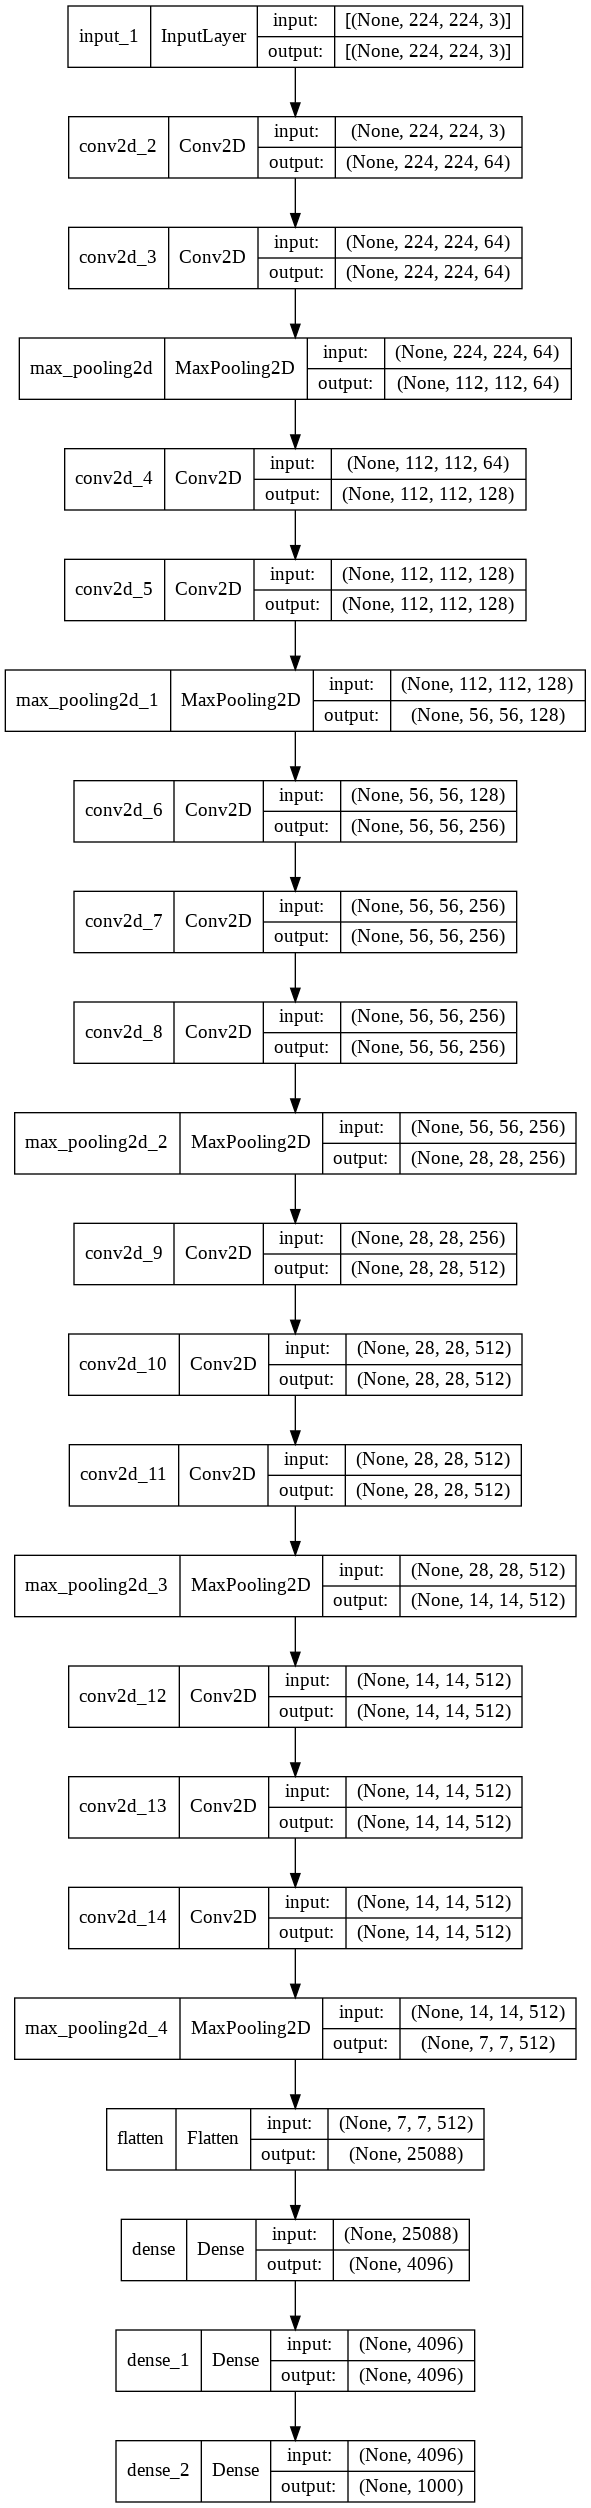

In [14]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)